<a href="https://colab.research.google.com/github/leakydishes/Fairness_feedback_nlp_test/blob/main/Fairness_feedback_nlp_test_semantic_communication_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deakin University Internship 2023**
##*Phase 2,* Semantic Communication

######This research (*Phase 2*) includes semantic communication implemented by using a combination of deep neural networks (NNs) and physical channel simulations. Using "Robustness_Transfer.py" (file from Phase 1) semantic encoding is performed using a DualModel (Roberta tokenizer). The preprocessed data is passed through a channel encoder (with a physical channel simulation) to test the robustness of the system under different types of noises. The channel decoder NNs with neural noise channel simulations is used to decode the semantic representations and calculate the BER values. Performance is measured by evaluating the BER values found under different noise conditions. <br>

<br>

###Project includes,
#####*Phase 1,* Human-Guided Fair Classification for NLP
#####*Phase 2,* Semantic Communication
<br>

#####References:
*@inproceedings{
dorner2023humanguided,
title={Human-Guided Fair Classification for Natural Language Processing},
author={Florian E. Dorner and Momchil Peychev and Nikola Konstantinov and Naman Goel and Elliott Ash and Martin Vechev},
booktitle={The Eleventh International Conference on Learning Representations },
year={2023},
url={https://openreview.net/forum?id=N_g8TT9Cy7f}
}*

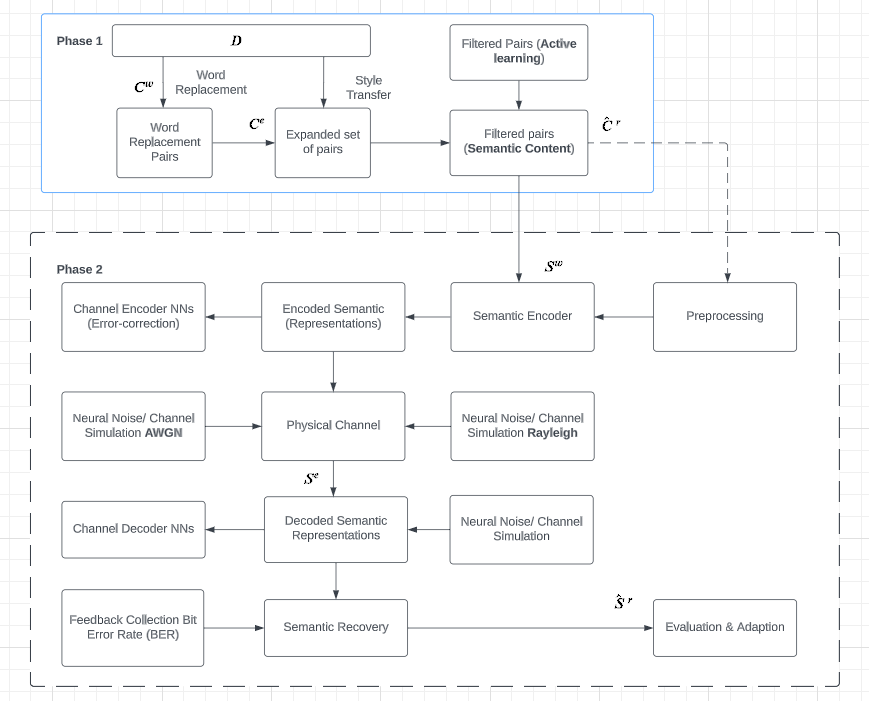

##**Step 1. Mount Google Drive**

In [1]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
#permanently install the specific version to the google colab
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,965 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.3 [1,305 kB]
Fetched 1,677 kB in 2s (714 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog b

In [3]:
#Install correct packages
!sudo apt-get install python3.8-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.8-lib2to3
The following NEW packages will be installed:
  python3.8-distutils python3.8-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,237 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-lib2to3 all 3.8.18-1+jammy1 [126 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-distutils all 3.8.18-1+jammy1 [193 kB]
Fetched 319 kB in 4s (87.3 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize front

In [4]:
%cd /content/drive/MyDrive/fairness-feedback-nlp/Code
!pip install -r requirements.txt

/content/drive/MyDrive/fairness-feedback-nlp/Code
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 84.4 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.6.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0

### Install Transformers

In [8]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.5 MB/s eta 0:00:00


##**Step 2. Preprocessing data**
####Load Model from Phase 1 training

In [20]:
import json
from transformers import RobertaTokenizer, RobertaModel
import torch


# Path of model from Phase 1 training
model_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/generations/Bart_test_label_attention_mean_640"

# Load model
model = torch.load(model_path)

###Semantic Encoding
#### Tokenize sentences, obtain their embeddings using the Roberta model, and replace the original data with embeddings and sentences using the saved perturbation dictionary from phase 1

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
import json
import time

# Load the perturbed data from the JSON file
with open('/content/drive/MyDrive/fairness-feedback-nlp/Code/Results/perturbation_dict_eval.json') as file:
    perturbed_data = json.load(file)

# Initialize the tokenizer with padding_side='right'
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', padding_side='right')
model_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/generations/Bart_test_label_attention_mean_640"
model = RobertaModel.from_pretrained('roberta-base')

def process_sentence(sentence, tokenizer, model):
    # Tokenize sentence
    tokens = tokenizer(sentence, return_tensors='pt', padding='max_length', truncation=True, max_length=64)

    # Embeddings for sentence
    start_time = time.time()
    with torch.no_grad():
        embeddings = model(**tokens).last_hidden_state
    elapsed_time = time.time() - start_time
    flattened_embeddings = [emb.tolist() for emb in embeddings.squeeze()]
    return flattened_embeddings, elapsed_time

total_sentences = sum(len(data) if isinstance(data, list) else 1 for data in perturbed_data.values())
processed_count = 0

for id, data in perturbed_data.items():
    if isinstance(data, list):
        # Nested list of sentences
        embeddings_list = []
        sentence_list = []
        for sentence_pair in data:
            # Find original sentence and perturbed sentence
            orig_sentence = sentence_pair[0]
            perturbed_sentence = sentence_pair[1]
            print(f"Processing perturbed sentence: {perturbed_sentence}")

            # Process perturbed sentences
            perturbed_embeddings, elapsed_time = process_sentence(perturbed_sentence, tokenizer, model)
            embeddings_list.append(perturbed_embeddings)
            sentence_list.append(perturbed_sentence)
            processed_count += 1
            percentage = (processed_count / total_sentences) * 100
            print(f"{percentage:.1f}% {processed_count}/{total_sentences}")

        # Replace (list) sentence pairs with (lists) of embeddings/ sentences
        perturbed_data[id] = {'embeddings': embeddings_list, 'sentence': sentence_list}
    else:
        # Dictionary (sentence key)
        if isinstance(data['sentence'], list):
            # Find sentence from list
            sentence = data['sentence'][0]
        else:
            sentence = data['sentence']
        print(f"Processing sentence: {sentence}")
        # Process sentences
        embeddings, elapsed_time = process_sentence(sentence, tokenizer, model)
        perturbed_data[id] = {'embeddings': embeddings, 'sentence': sentence}
        processed_count += 1
        percentage = (processed_count / total_sentences) * 100
        print(f"{percentage:.1f}% {processed_count}/{total_sentences}")

# Save JSON
output_file = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Results/perturbation_dict_eval_processed.json"
with open(output_file, 'w') as file:
    json.dump(perturbed_data, file)

print(f"Processed data saved to {output_file}")

# perturbed_data = processed embeddings and sentences


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Streaming output truncated to the last 5000 lines.
Processing perturbed sentence: the Canadian British North America Act  created Catholic schools in Ontario and atheist ones in Quebec  we follow OUR constitution and not the UN
90.0% 22501/25000
Processing perturbed sentence: the Canadian British North America Act  created Catholic schools in Ontario and atheist ones in Quebec  we follow OUR constitution and not the UN
90.0% 22502/25000
Processing perturbed sentence: the Canadian British North America Act  created Catholic schools in Ontario and atheist ones in Quebec  we follow OUR constitution and not the UN
90.0% 22503/25000
Processing perturbed sentence: the Canadian British North America Act  created Catholic schools in Ontario and atheist ones in Quebec  we follow OUR constitution and not the UN
90.0% 22504/25000
Processing perturbed sentence: the Canadian British North America Act  created Catholic schools in Ontario and atheist ones in Quebec  we follow OUR constitution and not

##**Step 3. Physical Channel with different types of noise**
####AWGN, Rayleigh fading, and multiplicative Guassian noise (test robustness of semantic encoding)

In [ ]:
# Implmenting
# '''
# # AWGN, Rayleigh fading, and multiplicative Guassian noise (test robustness of semantic encoding)
# '''


##**Step 4. Channel Decoding and Semantic Recovery**
####Decoded semantic representations into channel decoder (NNs noise channel simulations). Bit Error Rate (BER) calculated to identify accuracy/ noise present.

In [ ]:
# Implmenting
# '''
# #Decoded semantic representations into channel decoder (NNs noise channel simulations). Bit Error Rate (BER) calculated to identify accuracy/ noise present.
# '''



##**Step 5. Evaluation**
####Comparing BER values from different noise conditions.


In [ ]:
# Implmenting
# '''
# #Comparing BER values from different noise conditions.
# '''